In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('data/911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**What are the top 5 zipcodes for 911 calls?**

In [5]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 townships for 911 calls?**

In [6]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**How many unique title codes are there?**

In [7]:
df['title'].nunique()

110

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [8]:
def getReason(title:str):
    if 'EMS' in title: return 'EMS'
    if 'Fire' in title: return 'Fire'
    if 'Traffic' in title: return 'Traffic'
    return None

df['Reason'] = df['title'].apply(getReason)

**What is the most common Reason for a 911 call based off of this new column?**

In [10]:
df['Reason'].value_counts().head()

EMS        48879
Traffic    35695
Fire       14918
Name: Reason, dtype: int64

**Now use seaborn to create a countplot of 911 calls by Reason.**

<AxesSubplot:xlabel='Reason', ylabel='count'>

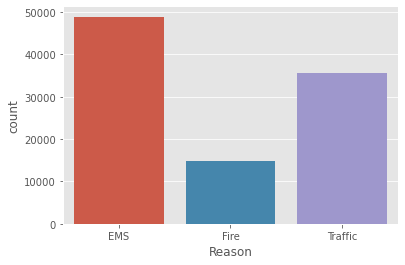

In [37]:
sns.countplot(x='Reason',data=df)

**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [13]:
type(df.timeStamp.iloc[0])

str

**You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df.timeStamp.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**You can now grab specific attributes from a Datetime object by calling them. For example:**

```py
    time = df['timeStamp'].iloc[0]
    time.hour
```

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [25]:
def getHour(timestamp):
    return timestamp.hour

def getMonth(timestamp):
    return timestamp.month

def getDayOfWeek(timestamp):
    return timestamp.day_of_week

df['Hour'] = df['timeStamp'].apply(getHour)
df['Month'] = df['timeStamp'].apply(getMonth)
df['Day of Week'] = df['timeStamp'].apply(getDayOfWeek)

**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

```py
    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
```

In [27]:
dmap = {
    0:'Mon',
    1:'Tue',
    2:'Wed',
    3:'Thu',
    4:'Fri',
    5:'Sat',
    6:'Sun'
}

df['Day of Week'] = df['Day of Week'].map(dmap)

**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

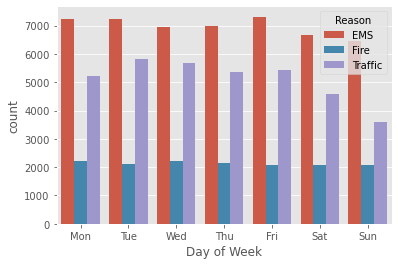

In [38]:
sns.countplot(x='Day of Week',data=df,hue="Reason",order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

**Now do the same for Month.**

<AxesSubplot:xlabel='Month', ylabel='count'>

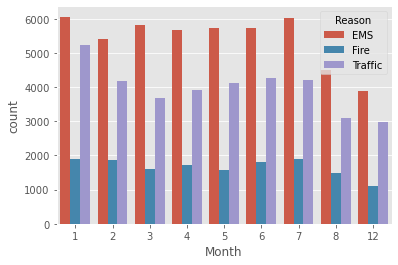

In [39]:
sns.countplot(x='Month',data=df,hue="Reason")

**Did you notice something strange about the Plot?**

_____

**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [96]:
byMonth = df.groupby(by='Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Date
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

<AxesSubplot:xlabel='Month'>

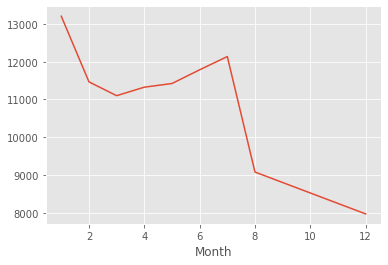

In [97]:
byMonth['title'].plot()

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

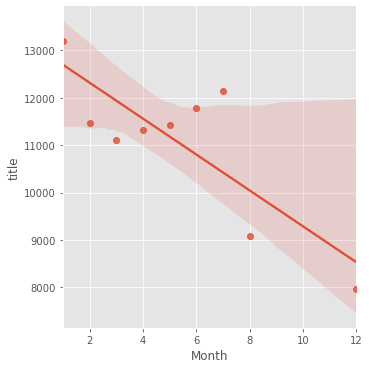

In [99]:
byMonth.reset_index(inplace=True)
sns.lmplot(x='Month',y='title',data=byMonth)

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.** 

In [46]:
def getDate(timestamp):
    return timestamp.date()

df['Date'] = df['timeStamp'].apply(getDate)

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [55]:
date_grouped = df.groupby(by='Date').count()
date_grouped.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


<AxesSubplot:xlabel='Date'>

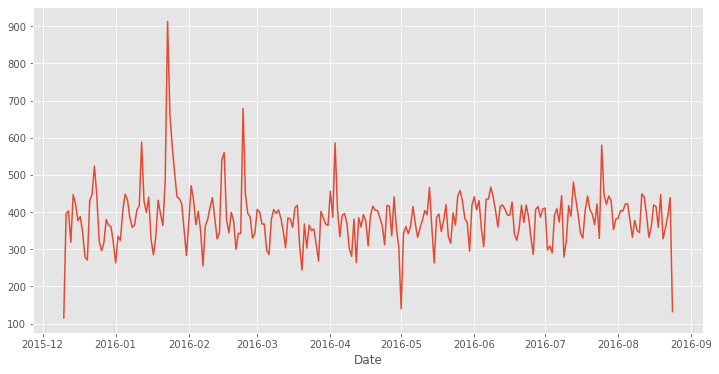

In [86]:
plt.figure(figsize=(12,6))
date_grouped['title'].plot()

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [59]:
date_reason_df = df.groupby(by=['Date','Reason']).count()
date_reason_df.head()
date_reason_df.reset_index(inplace=True)

Text(0.5, 1.0, 'EMS')

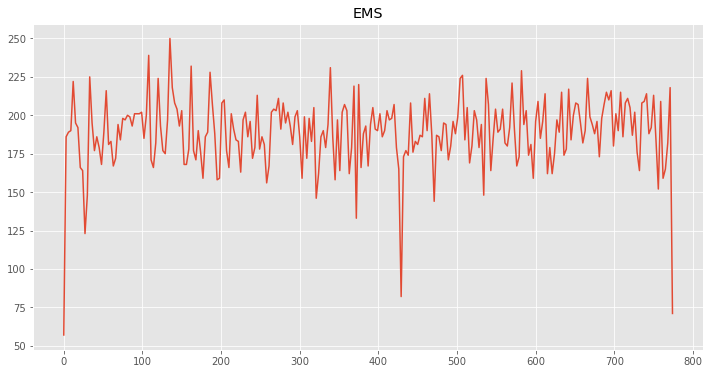

In [87]:
# EMS Plot
plt.figure(figsize=(12,6))
ems_df = date_reason_df[date_reason_df['Reason'] == 'EMS']
ems_df['title'].plot()
plt.title('EMS')

Text(0.5, 1.0, 'Fire')

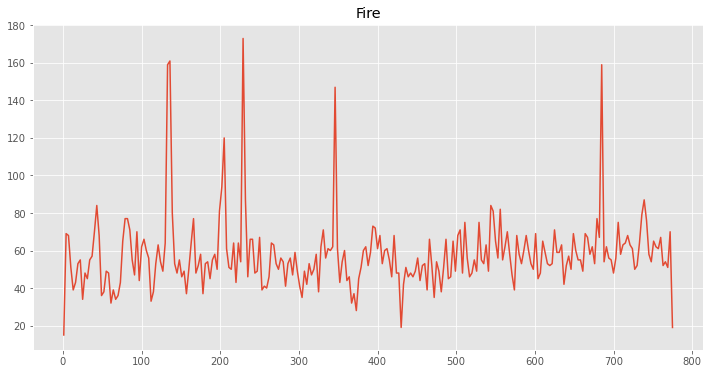

In [88]:
# Fire Plot
plt.figure(figsize=(12,6))
fire_df = date_reason_df[date_reason_df['Reason'] == 'Fire']
fire_df['title'].plot()
plt.title('Fire')

Text(0.5, 1.0, 'Traffic')

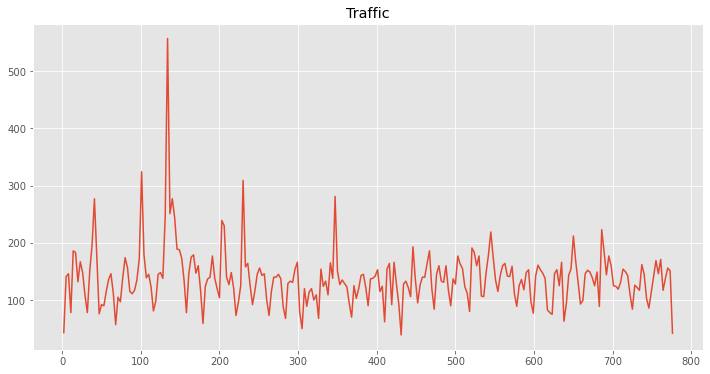

In [89]:
# Traffic Plot
plt.figure(figsize=(12,6))
traffic_df = date_reason_df[date_reason_df['Reason'] == 'Traffic']
traffic_df['title'].plot()
plt.title('Traffic')

**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [84]:
dayhour_df = df.groupby(by=['Day of Week','Hour']).count()
dayhour_df = dayhour_df['Reason'].unstack(level=-1)
dayhour_df.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**Now create a HeatMap using this new DataFrame.**

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

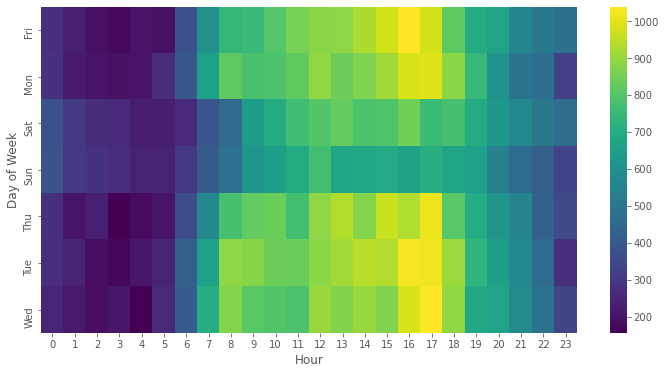

In [85]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dayhour_df,cmap='viridis')

**Now create a clustermap using this DataFrame.**

<Figure size 864x432 with 0 Axes>

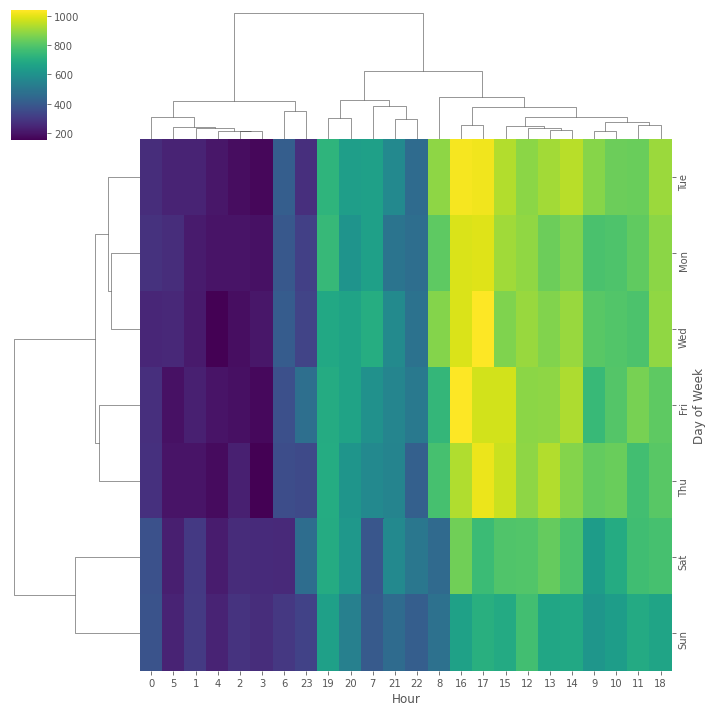

In [83]:
plt.figure(figsize=(12,6))
sns.clustermap(data=dayhour_df,cmap='viridis')

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [100]:
daymonth_df = df.groupby(by=['Day of Week','Month']).count()
daymonth_df = daymonth_df['Reason'].unstack(level=-1)
daymonth_df.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

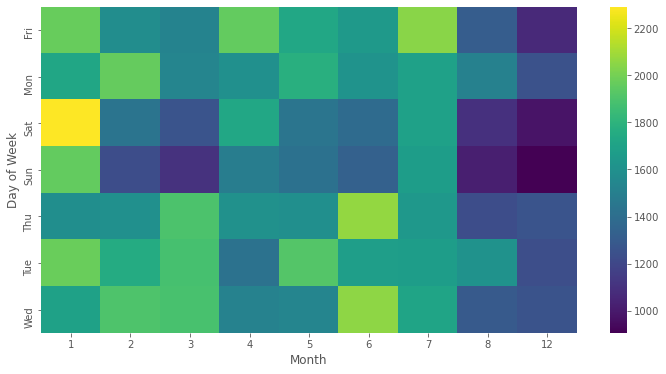

In [101]:
plt.figure(figsize=(12,6))
sns.heatmap(data=daymonth_df,cmap='viridis')

<Figure size 864x432 with 0 Axes>

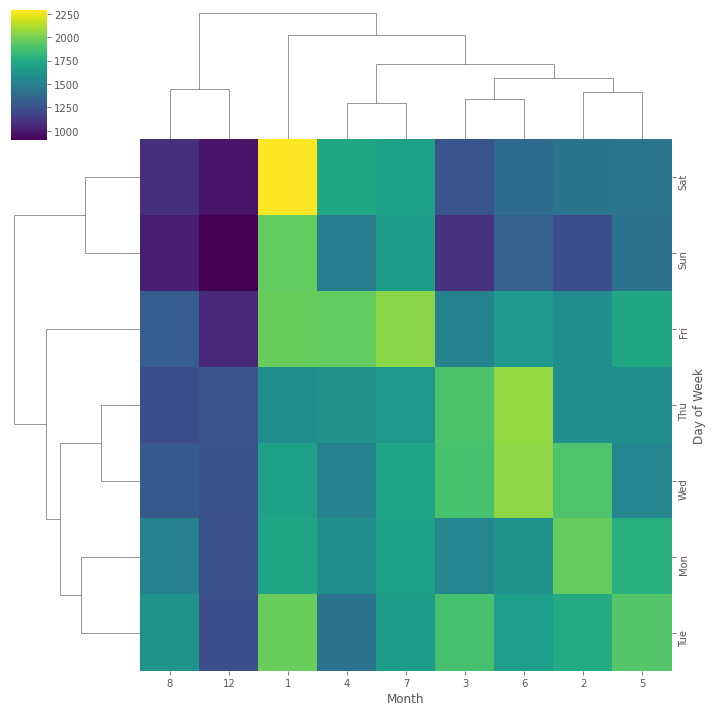

In [102]:
plt.figure(figsize=(12,6))
sns.clustermap(data=daymonth_df,cmap='viridis')